# Image Classification

In this notebook we will train a neural network model to classify images of clothing, like sneakers and shirts.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tf

## Import the Fashion MNIST dataset

This notebook uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [4]:
fashion_mnist = tf.datasets.fashion_mnist

In [5]:
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step



<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [11]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

## Explore the Data

In [12]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
len(test_labels)

10000

## Preprocess the Data

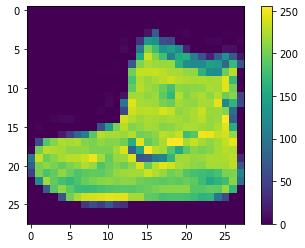

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Scale these values to a range of 0 to 1 before feeding them to the neural network model. 

In [24]:
train_images = train_images/255

test_images = test_images/255

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

In [27]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

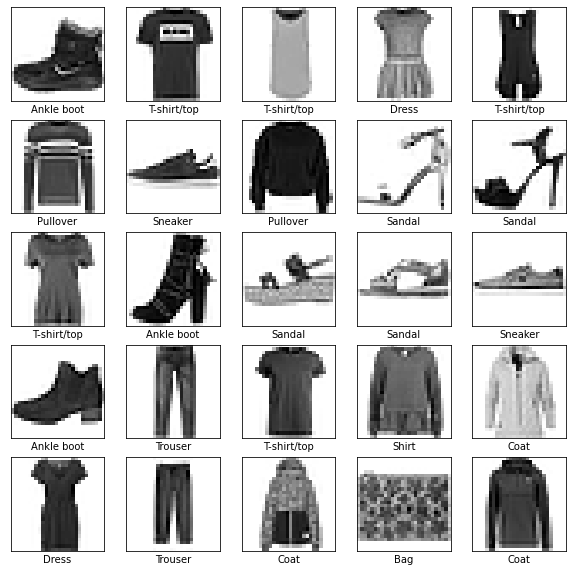

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Build the model

In [89]:
model = tf.Sequential()

In [90]:
model.add(tf.layers.Flatten(input_shape = (28,28)))

In [91]:
model.add(tf.layers.Dense(units = 128, activation= 'relu'))

In [92]:
model.add(tf.layers.Dense(units = 10, activation = 'sigmoid'))

## Compile the Model

In [93]:
model.compile(optimizer = 'adam', loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

## Train the Model

In [94]:
model.fit(train_images, train_labels, epochs = 20, batch_size = 64)

Epoch 1/20
938/938 [==============================] - 1s 1ms/step - loss: 0.5135 - accuracy: 0.8213
Epoch 2/20
938/938 [==============================] - 1s 1ms/step - loss: 0.3858 - accuracy: 0.8620
Epoch 3/20
938/938 [==============================] - 1s 1ms/step - loss: 0.3435 - accuracy: 0.8760
Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.3192 - accuracy: 0.8841
Epoch 5/20
938/938 [==============================] - 1s 1ms/step - loss: 0.3011 - accuracy: 0.8903
Epoch 6/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2856 - accuracy: 0.8960
Epoch 7/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2728 - accuracy: 0.8990
Epoch 8/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2621 - accuracy: 0.9032
Epoch 9/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2529 - accuracy: 0.9068
Epoch 10/20
938/938 [==============================] - 1s 1ms/step - loss: 0.2455 - accuracy: 0.9089

## Evaluate Accuracy

In [96]:
model.evaluate(test_images, test_labels)[1]*100

313/313 [==============================] - 0s 700us/step - loss: 0.3506 - accuracy: 0.8819


88.19000124931335

## Predictions

In [118]:
predictions_array = model.predict(test_images)
predictions_array

array([[4.0725936e-05, 7.2048301e-09, 7.3967316e-10, ..., 5.4172349e-01,
        9.5875828e-07, 9.9926376e-01],
       [6.9730234e-01, 5.3831001e-10, 9.9999052e-01, ..., 3.1358798e-08,
        4.2787553e-07, 2.7626983e-09],
       [7.7307254e-02, 1.0000000e+00, 5.0556660e-04, ..., 3.4767582e-17,
        1.5769812e-05, 1.6594988e-11],
       ...,
       [2.9069483e-03, 8.8352072e-09, 5.0669700e-05, ..., 2.7693950e-06,
        9.7308910e-01, 7.9252757e-11],
       [5.1441789e-04, 9.9935466e-01, 5.1595602e-05, ..., 4.1799901e-12,
        3.4872930e-05, 3.4345042e-09],
       [1.9363463e-03, 3.2303069e-07, 4.5829682e-05, ..., 1.7863935e-01,
        4.7991872e-03, 6.0597062e-04]], dtype=float32)

In [119]:
np.argmax(predictions_array[0])

9

In [105]:
test_labels[0]

9

So, the model is most confident that this image is an ankle boot, or class_names[9]

Graph this to look at the full set of 10 class predictions.

In [187]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel('{}, {:.2f}%,({})'.format(class_names[predicted_label], 
                                      100*np.max(predictions_array), class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label= true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

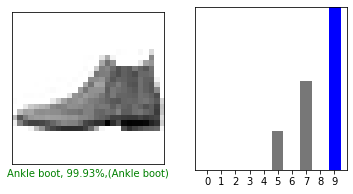

In [188]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_array[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_array[i],  test_labels)
plt.show()

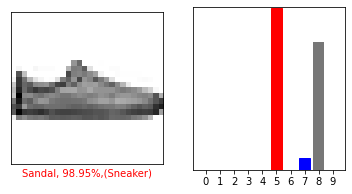

In [191]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_array[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_array[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

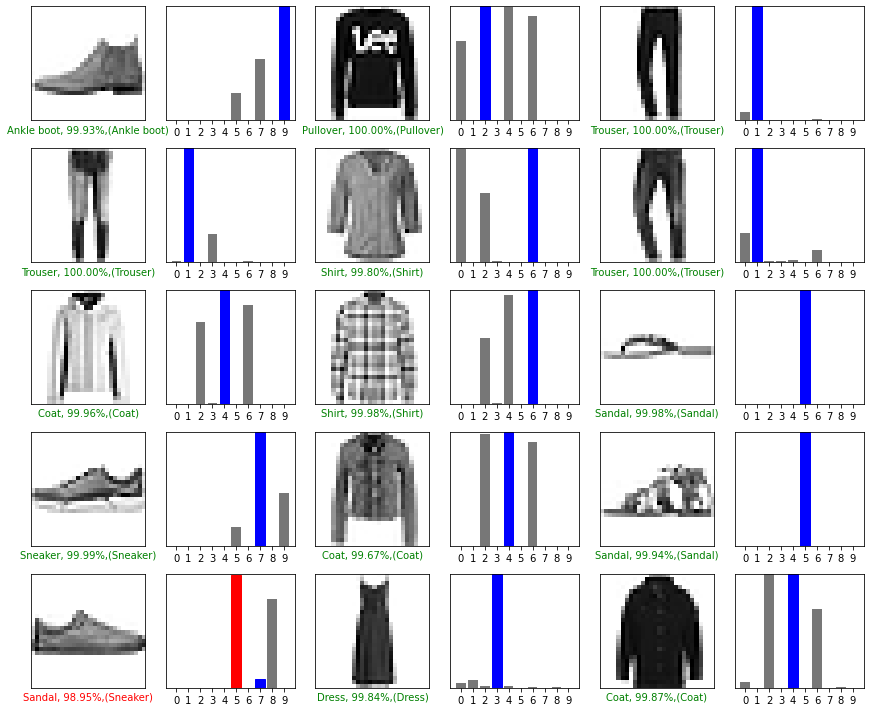

In [195]:
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_array[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_array[i], test_labels)
plt.tight_layout()
plt.show()